In [1]:
import torch
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import math

tensor([0.0000, 0.2167, 0.4333, 0.6500, 0.8666, 1.0833, 1.3000, 1.5166, 1.7333,
        1.9500, 2.1666, 2.3833, 2.5999, 2.8166, 3.0333, 3.2499, 3.4666, 3.6832,
        3.8999, 4.1166, 4.3332, 4.5499, 4.7666, 4.9832, 5.1999, 5.4165, 5.6332,
        5.8499, 6.0665, 6.2832], requires_grad=True)


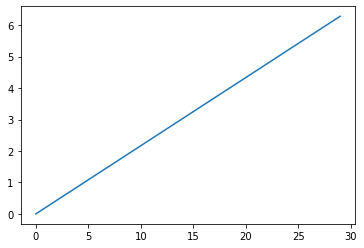

In [2]:
a  = torch.linspace(0.,2.*math.pi, steps = 30, requires_grad = True)
print(a)
plt.plot(a.detach())  #?? detach

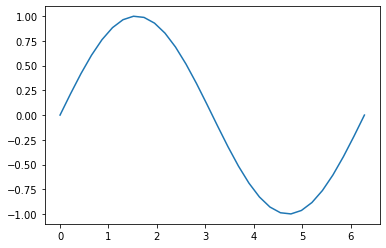

In [3]:
b = torch.sin(a)
plt.plot(a.detach(), b.detach())

Note that b, comes drom applying sine to the tensor `a`, and the `grad_fn=<SinBackward>` indicates this fact to keep track of the dependencies of $b = sin(a)$ 

In [4]:
print(b)

tensor([ 0.0000e+00,  2.1497e-01,  4.1989e-01,  6.0517e-01,  7.6216e-01,
         8.8351e-01,  9.6355e-01,  9.9853e-01,  9.8683e-01,  9.2898e-01,
         8.2769e-01,  6.8770e-01,  5.1555e-01,  3.1930e-01,  1.0812e-01,
        -1.0812e-01, -3.1930e-01, -5.1555e-01, -6.8770e-01, -8.2769e-01,
        -9.2898e-01, -9.8683e-01, -9.9853e-01, -9.6355e-01, -8.8351e-01,
        -7.6216e-01, -6.0517e-01, -4.1989e-01, -2.1497e-01,  1.7485e-07],
       grad_fn=<SinBackward0>)


In [5]:
c = 2 * b
print(c)
d= c + 1
print(d)

tensor([ 0.0000e+00,  4.2994e-01,  8.3978e-01,  1.2103e+00,  1.5243e+00,
         1.7670e+00,  1.9271e+00,  1.9971e+00,  1.9737e+00,  1.8580e+00,
         1.6554e+00,  1.3754e+00,  1.0311e+00,  6.3860e-01,  2.1624e-01,
        -2.1624e-01, -6.3860e-01, -1.0311e+00, -1.3754e+00, -1.6554e+00,
        -1.8580e+00, -1.9737e+00, -1.9971e+00, -1.9271e+00, -1.7670e+00,
        -1.5243e+00, -1.2103e+00, -8.3978e-01, -4.2994e-01,  3.4969e-07],
       grad_fn=<MulBackward0>)
tensor([ 1.0000,  1.4299,  1.8398,  2.2103,  2.5243,  2.7670,  2.9271,  2.9971,
         2.9737,  2.8580,  2.6554,  2.3754,  2.0311,  1.6386,  1.2162,  0.7838,
         0.3614, -0.0311, -0.3754, -0.6554, -0.8580, -0.9737, -0.9971, -0.9271,
        -0.7670, -0.5243, -0.2103,  0.1602,  0.5701,  1.0000],
       grad_fn=<AddBackward0>)


In [6]:
out = d.sum()
print(out)

tensor(30., grad_fn=<SumBackward0>)


$d = 2*(sin(a)) + 1$

In [7]:
print(a.grad)
print(d.grad_fn)
print(d.grad_fn.next_functions)
print(d.grad_fn.next_functions[0][0].next_functions)
print(d.grad_fn.next_functions[0][0].next_functions[0][0].next_functions)
print(d.grad_fn.next_functions[0][0].next_functions[0][0].next_functions[0][0].next_functions)

None
((<MulBackward0 object at 0x136f8df40>, 0), (None, 0))
((<SinBackward0 object at 0x136f9f190>, 0), (None, 0))
((<AccumulateGrad object at 0x136f8de50>, 0),)
()


$\frac{\partial d}{\partial a} = 2*cos(a)$

tensor([ 2.0000,  1.9532,  1.8152,  1.5922,  1.2948,  0.9368,  0.5351,  0.1083,
        -0.3236, -0.7403, -1.1224, -1.4520, -1.7137, -1.8953, -1.9883, -1.9883,
        -1.8953, -1.7137, -1.4520, -1.1224, -0.7403, -0.3236,  0.1083,  0.5351,
         0.9368,  1.2948,  1.5922,  1.8152,  1.9532,  2.0000])


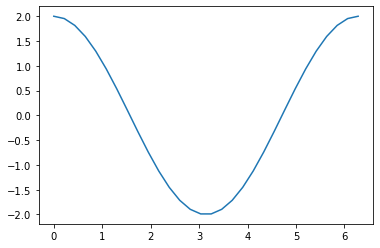

In [8]:
out.backward()
print(a.grad)
plt.plot(a.detach(), a.grad.detach())

# Autograd in Training

In [9]:
BATCH_SIZE = 20
DIM_IN = 1000
HIDDEN_SIZE = 100
DIM_OUT = 10

class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        
        self.layer1 = torch.nn.Linear(1000, 100)
        self.relu = torch.nn.ReLU()
        self.layer2 = torch.nn.Linear(100,10)
        
    def forward(self, x):
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        return x
    
some_input = torch.randn(BATCH_SIZE,DIM_IN,requires_grad = False)
desired_output = torch.randn(BATCH_SIZE, DIM_OUT, requires_grad = False)

model = Model()

In [10]:
print(model.layer2.weight[1][1:10])
print(model.layer2.weight.grad)
print (model.parameters())

tensor([-0.0502, -0.0929,  0.0563,  0.0523, -0.0152, -0.0272,  0.0250,  0.0673,
        -0.0963], grad_fn=<SliceBackward0>)
None
<generator object Module.parameters at 0x136e090b0>


In [11]:
#select optimizer
optimizer = torch.optim.SGD(model.parameters(), lr= 0.001)

prediction = model(some_input)
#Calculate the Loss
loss = (desired_output - prediction).pow(2).sum()
print(loss)
print(loss.item())
print(loss.grad_fn.next_functions)
print(loss.grad_fn.next_functions[0][0].next_functions)
print(loss.grad_fn.next_functions[0][0].next_functions[0][0].next_functions[0][0])

tensor(231.1026, grad_fn=<SumBackward0>)
231.10263061523438
((<PowBackward0 object at 0x13700d700>, 0),)
((<SubBackward0 object at 0x13700dca0>, 0),)
None


The function `loss.backward()` updates the property `weights.grad` on the weights/variables in the direction that minimizes the loss function. It only gets updated once the `optimizer.step()` function is executed on the optimizer

In [12]:
loss.backward()
print(model.layer2.weight[1][1:10])
print(model.layer2.weight.grad[1][1:10])

tensor([-0.0502, -0.0929,  0.0563,  0.0523, -0.0152, -0.0272,  0.0250,  0.0673,
        -0.0963], grad_fn=<SliceBackward0>)
tensor([ 2.3373,  2.4710,  1.3426,  0.3748,  1.4493, -3.8485, -0.7343,  0.8522,
        -1.7080])


In [13]:
optimizer.step()
print(model.layer2.weight[1][1:10])
print(model.layer2.weight.grad[1][1:10])

tensor([-0.0526, -0.0954,  0.0549,  0.0519, -0.0167, -0.0234,  0.0257,  0.0664,
        -0.0946], grad_fn=<SliceBackward0>)
tensor([ 2.3373,  2.4710,  1.3426,  0.3748,  1.4493, -3.8485, -0.7343,  0.8522,
        -1.7080])


After the update, it is necessary to "clear" the grad values, to avoid accumulation of the values. For this purpose use the function `optimizer.zero_ grad()`

In [14]:
optimizer.zero_grad()
print(model.layer2.weight[1][1:10])
print(model.layer2.weight.grad[1][1:10])

tensor([-0.0526, -0.0954,  0.0549,  0.0519, -0.0167, -0.0234,  0.0257,  0.0664,
        -0.0946], grad_fn=<SliceBackward0>)
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0.])


## Turning ON/OFF Autograd

In [16]:
a = torch.ones(2,3, requires_grad = True)*2
b = torch.ones(2,3, requires_grad = True)*2

c1 = a + b

#use the context as with
with torch.no_grad():
    c2 = a + b
    
print(c1)
print(c2)

tensor([[4., 4., 4.],
        [4., 4., 4.]], grad_fn=<AddBackward0>)
tensor([[4., 4., 4.],
        [4., 4., 4.]])


`torch.no_grad()` can be used as a function decorator. Same canbe done with `torch.enable_grad()`

In [19]:
def add_tensors1(x,y):
    return x + y

@torch.no_grad()
def add_tensors2(x,y):
    return x + y

d1 = add_tensors1(a,b)
d2 = add_tensors2(a,b)

print(d1)
print(d2)



tensor([[4., 4., 4.],
        [4., 4., 4.]], grad_fn=<AddBackward0>)
tensor([[4., 4., 4.],
        [4., 4., 4.]])


 The function `detach()` creates a copy of the tensor that is *detached* from the computation history. This is usefull when a tensor needs to be converted to a NumPy array. The tensors with `requires_grad = True` are not enabled to be transformed

In [20]:
print(a)
print(a.detach())

tensor([[2., 2., 2.],
        [2., 2., 2.]], grad_fn=<MulBackward0>)
tensor([[2., 2., 2.],
        [2., 2., 2.]])
